In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv

# Import API key

from pyowm import OWM

owm = OWM('9a36f848b0a8e9096cf7dbd37ed429c0')


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [22]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lat_range = (-90, 90)
lng_range = (-180, 180)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [70]:
owm = OWM('9a36f848b0a8e9096cf7dbd37ed429c0')
target_url = ('https://api.openweathermap.org/data/2.5/onecall?lat=30.489772&lon=-99.771335&appid=9a36f848b0a8e9096cf7dbd37ed429c0').format(cities,owm)
cityowm = requests.get(target_url).json()
print(cityowm)


{'lat': 30.4898, 'lon': -99.7713, 'timezone': 'America/Chicago', 'timezone_offset': -18000, 'current': {'dt': 1616332823, 'sunrise': 1616330476, 'sunset': 1616374258, 'temp': 281.15, 'feels_like': 278.58, 'pressure': 1021, 'humidity': 71, 'dew_point': 276.22, 'uvi': 0, 'clouds': 1, 'visibility': 10000, 'wind_speed': 1.54, 'wind_deg': 190, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}]}, 'minutely': [{'dt': 1616332860, 'precipitation': 0}, {'dt': 1616332920, 'precipitation': 0}, {'dt': 1616332980, 'precipitation': 0}, {'dt': 1616333040, 'precipitation': 0}, {'dt': 1616333100, 'precipitation': 0}, {'dt': 1616333160, 'precipitation': 0}, {'dt': 1616333220, 'precipitation': 0}, {'dt': 1616333280, 'precipitation': 0}, {'dt': 1616333340, 'precipitation': 0}, {'dt': 1616333400, 'precipitation': 0}, {'dt': 1616333460, 'precipitation': 0}, {'dt': 1616333520, 'precipitation': 0}, {'dt': 1616333580, 'precipitation': 0}, {'dt': 1616333640, 'precipitation': 0},

In [72]:
cities_pd = pd.read_csv("downloads/cities.csv")
cities_pd.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [82]:
df = cities_pd[cities_pd.Humidity >= 100]
df.head()


,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
67,67,hambantota,40,LK,1558378766,100,6.12,81.12,80.60,3.36
129,129,paita,0,PE,1558378778,290,-5.09,-81.11,62.60,17.22
159,159,manado,40,ID,1558378784,100,1.49,124.85,73.40,4.97
177,177,keflavik,75,IS,1558378788,100,64.00,-22.56,51.01,9.17
212,212,mount gambier,90,AU,1558378628,100,-37.83,140.78,53.60,8.05


In [84]:
clean_citydata = cities_pd[cities_pd.Humidity < 100]
clean_citydata.head(10)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
5,5,atuona,78,PF,1558378755,76,-9.80,-139.03,81.96,16.49
6,6,flinders,0,AU,1558378755,62,-34.58,150.85,60.01,11.41
7,7,opuwo,0,NaN,1558378523,23,-18.06,13.84,72.06,5.44
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93


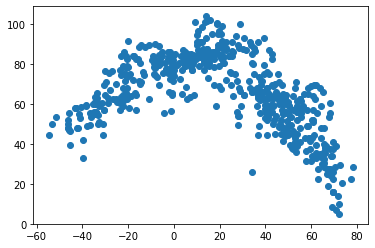

In [87]:
x = clean_citydata["Lat"]
y = clean_citydata["Max Temp"]
plt.scatter(x,y)

plt.show()

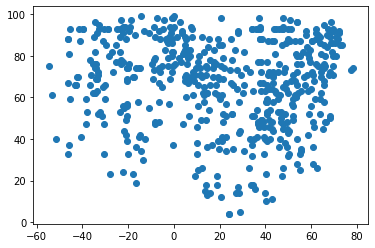

In [88]:
x2 = clean_citydata["Lat"]
y2 = clean_citydata["Humidity"]
plt.scatter(x2,y2)

plt.show()

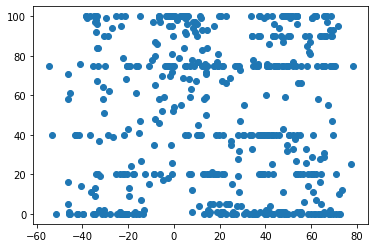

In [89]:
x3 = clean_citydata["Lat"]
y3 = clean_citydata["Cloudiness"]
plt.scatter(x3,y3)

plt.show()

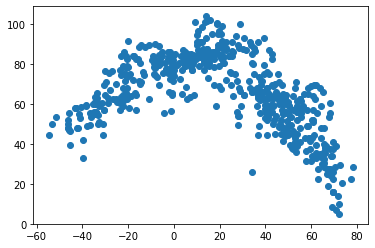

In [90]:
x4 = clean_citydata["Lat"]
y4 = clean_citydata["Wind Speed"]
plt.scatter(x,y)

plt.show()

The r-squared is: 0.16145679960164236


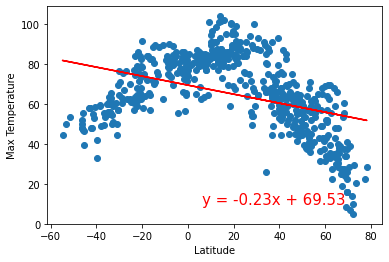

In [91]:

x_values = clean_citydata['Lat']
y_values = clean_citydata['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0036072459414299186


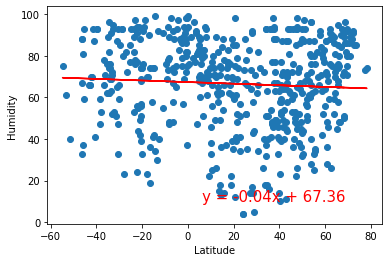

In [92]:
x_values2 = clean_citydata['Lat']
y_values2 = clean_citydata['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values2, y_values2)
regress_values = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values2,y_values2)
plt.plot(x_values2,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00010114764091497925


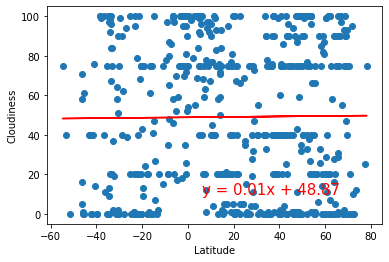

In [93]:
x_values3 = clean_citydata['Lat']
y_values3 = clean_citydata['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
regress_values = x_values3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values3,y_values3)
plt.plot(x_values3,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0036072459414299186


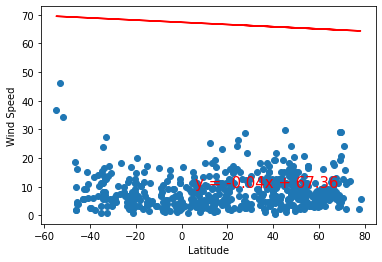

In [94]:
x_values4 = clean_citydata['Lat']
y_values4 = clean_citydata['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values4, y_values2)
regress_values = x_values4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values4,y_values4)
plt.plot(x_values4,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()